In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint
from sklearn.model_selection import cross_val_score

In [ ]:
url = 'https://raw.githubusercontent.com/cbarnes5/DATA606CapstoneProject/main/finalcsv.csv'
df = pd.read_csv(url, index_col = 0)

In [ ]:
df

,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,LOCATION,SQUARE FEET,LOT SIZE,YEAR BUILT,HOA/MONTH,LATITUDE,LONGITUDE
0,2024-04-10,Condo/Co-op,1024 N Utah St #223,Arlington,VA,22201.0,405000.0,1.0,1.0,WESTVIEW AT BALLSTON METRO,698.0,NaN,2005.0,522.0,38.882841,-77.114088
1,2024-03-29,Single Family Residential,4717 26th St N,Arlington,VA,22207.0,1600000.0,3.0,3.0,SHIRLEY WOODS,3812.0,17424.0,1937.0,0.0,38.902593,-77.127983
2,2024-03-14,Condo/Co-op,1029 N Stuart St N #216,Arlington,VA,22201.0,415951.0,1.0,1.0,SUMMERWALK I&II,714.0,NaN,1985.0,407.0,38.883113,-77.111557
3,2024-05-02,Condo/Co-op,851 N Glebe Rd #103,Arlington,VA,22203.0,450000.0,1.0,1.0,CONTINENTAL,752.0,NaN,2003.0,419.0,38.881249,-77.114559
4,2024-05-03,Single Family Residential,4224 23rd St N,Arlington,VA,22207.0,2100000.0,5.0,4.5,LORCOM GROVE,5694.0,6686.0,2007.0,0.0,38.900693,-77.113437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2422,2024-05-31,Townhouse,1250 Delafield Pl NE,Washington,DC,20017.0,540000.0,3.0,2.0,Riggs Park,1543.0,2970.0,1948.0,0.0,38.949609,-76.988199
2423,2024-03-13,Townhouse,1271 Delafield Pl NE,Washington,DC,20017.0,640000.0,3.0,2.5,Riggs Park,1861.0,2361.0,1951.0,0.0,38.949244,-76.987066
2425,2024-05-01,Townhouse,1237 Emerson St NE,Washington,DC,20017.0,680000.0,3.0,3.5,Riggs Park,1632.0,2125.0,1950.0,0.0,38.950116,-76.988046
2426,2024-04-16,Single Family Residential,1704 Michigan Ave NE,Washington,DC,20017.0,799900.0,3.0,2.5,Michigan Park,2139.0,3900.0,1948.0,0.0,38.943679,-76.980391


First we OHE the property type column

In [ ]:
df = pd.get_dummies(df, columns=['PROPERTY TYPE'], dtype = int)
df

,SOLD DATE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,LOCATION,SQUARE FEET,LOT SIZE,YEAR BUILT,HOA/MONTH,LATITUDE,LONGITUDE,PROPERTY TYPE_Condo/Co-op,PROPERTY TYPE_Single Family Residential,PROPERTY TYPE_Townhouse
0,2024-04-10,1024 N Utah St #223,Arlington,VA,22201.0,405000.0,1.0,1.0,WESTVIEW AT BALLSTON METRO,698.0,NaN,2005.0,522.0,38.882841,-77.114088,1,0,0
1,2024-03-29,4717 26th St N,Arlington,VA,22207.0,1600000.0,3.0,3.0,SHIRLEY WOODS,3812.0,17424.0,1937.0,0.0,38.902593,-77.127983,0,1,0
2,2024-03-14,1029 N Stuart St N #216,Arlington,VA,22201.0,415951.0,1.0,1.0,SUMMERWALK I&II,714.0,NaN,1985.0,407.0,38.883113,-77.111557,1,0,0
3,2024-05-02,851 N Glebe Rd #103,Arlington,VA,22203.0,450000.0,1.0,1.0,CONTINENTAL,752.0,NaN,2003.0,419.0,38.881249,-77.114559,1,0,0
4,2024-05-03,4224 23rd St N,Arlington,VA,22207.0,2100000.0,5.0,4.5,LORCOM GROVE,5694.0,6686.0,2007.0,0.0,38.900693,-77.113437,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2422,2024-05-31,1250 Delafield Pl NE,Washington,DC,20017.0,540000.0,3.0,2.0,Riggs Park,1543.0,2970.0,1948.0,0.0,38.949609,-76.988199,0,0,1
2423,2024-03-13,1271 Delafield Pl NE,Washington,DC,20017.0,640000.0,3.0,2.5,Riggs Park,1861.0,2361.0,1951.0,0.0,38.949244,-76.987066,0,0,1
2425,2024-05-01,1237 Emerson St NE,Washington,DC,20017.0,680000.0,3.0,3.5,Riggs Park,1632.0,2125.0,1950.0,0.0,38.950116,-76.988046,0,0,1
2426,2024-04-16,1704 Michigan Ave NE,Washington,DC,20017.0,799900.0,3.0,2.5,Michigan Park,2139.0,3900.0,1948.0,0.0,38.943679,-76.980391,0,1,0


Now we need to handle the location column. We will import an encoded df (see 'Exploring Location Options' notebook for more details) and experiment with the 10 different thresholds selected. We will end up with 10 different candidate dataframes as a result

In [ ]:
url = 'https://raw.githubusercontent.com/cbarnes5/DATA606CapstoneProject/main/encoded_df.csv'
encoded_df = pd.read_csv(url, index_col = 0)

In [ ]:
dropped = ['SOLD DATE', 'ADDRESS', 'CITY', 'STATE OR PROVINCE', 'ZIP OR POSTAL CODE', 'LOCATION', 'LATITUDE', 'LONGITUDE']
df = df.drop(columns = dropped)
df = df.fillna(0)

In [ ]:
thresholds = range(5, 55, 5)
dfs = {}
for threshold in thresholds:
    column_name = f'TARGET_ENCODED_PRICE_{threshold}'
    df_threshold = df.copy()
    df_threshold[column_name] = encoded_df[column_name]
    dfs[f'df_{threshold}'] = df_threshold

In [ ]:
dfs = {}
for threshold in thresholds:
    column_name = f'TARGET_ENCODED_PRICE_{threshold}'
    df_threshold = df.copy()
    df_threshold[column_name] = encoded_df[column_name]
    dfs[f'df_{threshold}'] = df_threshold

In [ ]:
dfs['df_5']

,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,HOA/MONTH,PROPERTY TYPE_Condo/Co-op,PROPERTY TYPE_Single Family Residential,PROPERTY TYPE_Townhouse,TARGET_ENCODED_PRICE_5
0,405000.0,1.0,1.0,698.0,0.0,2005.0,522.0,1,0,0,4.175000e+05
1,1600000.0,3.0,3.0,3812.0,17424.0,1937.0,0.0,0,1,0,1.535608e+06
2,415951.0,1.0,1.0,714.0,0.0,1985.0,407.0,1,0,0,4.726585e+05
3,450000.0,1.0,1.0,752.0,0.0,2003.0,419.0,1,0,0,6.814341e+05
4,2100000.0,5.0,4.5,5694.0,6686.0,2007.0,0.0,0,1,0,1.535608e+06
...,...,...,...,...,...,...,...,...,...,...,...
2422,540000.0,3.0,2.0,1543.0,2970.0,1948.0,0.0,0,0,1,6.054659e+05
2423,640000.0,3.0,2.5,1861.0,2361.0,1951.0,0.0,0,0,1,6.054659e+05
2425,680000.0,3.0,3.5,1632.0,2125.0,1950.0,0.0,0,0,1,6.054659e+05
2426,799900.0,3.0,2.5,2139.0,3900.0,1948.0,0.0,0,1,0,8.280667e+05


Let's look at a coorelation heat map before doing anything else

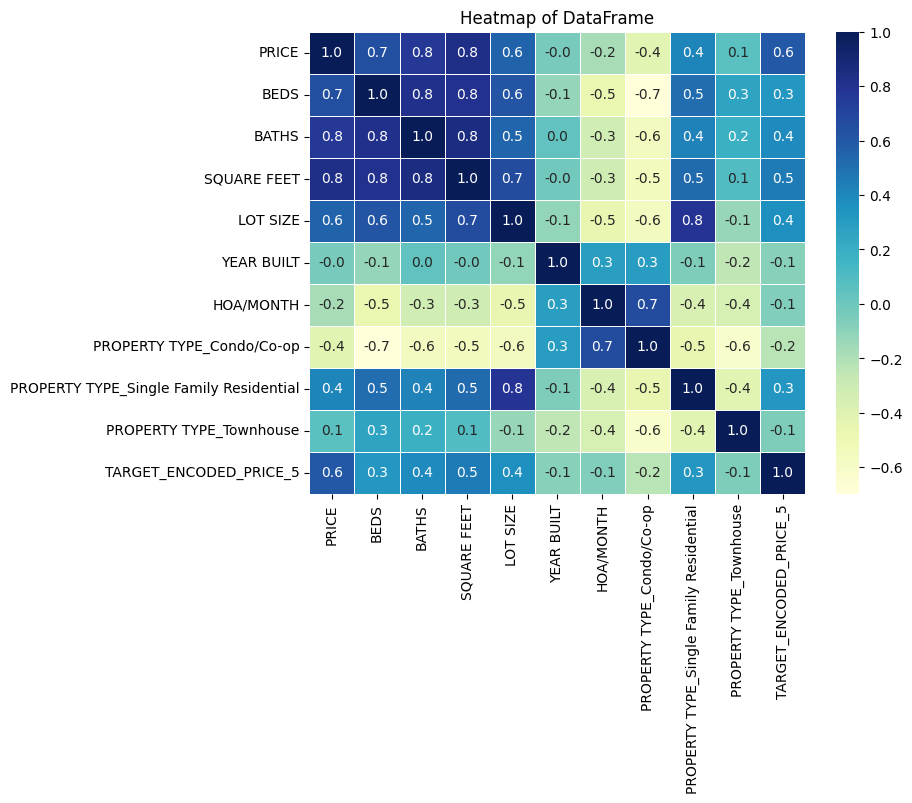

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(dfs['df_5'].corr(), annot=True, cmap='YlGnBu', fmt='.1f', linewidths=.5)
plt.title('Heatmap of DataFrame')
plt.show()

Interesting that year build has close to no correlation with sales price. Note that HOA/Month has a small correlation with sales price, and a very high correlation with Condo/Co-op, so we may consider omitting these. Let's observe the distribution of our variables

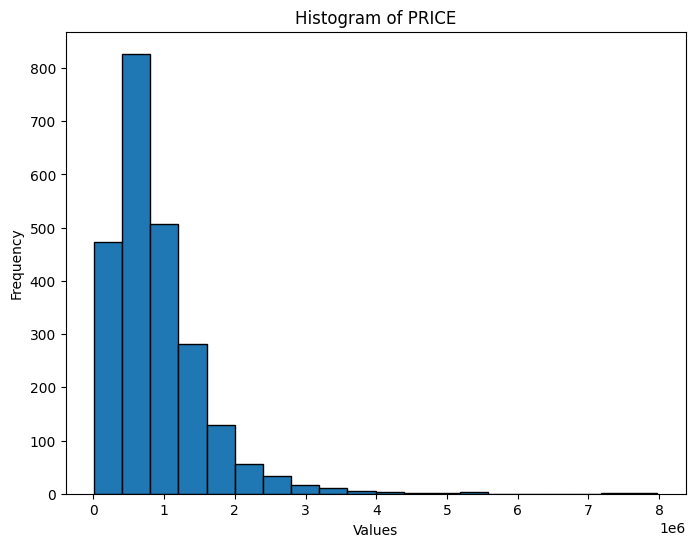

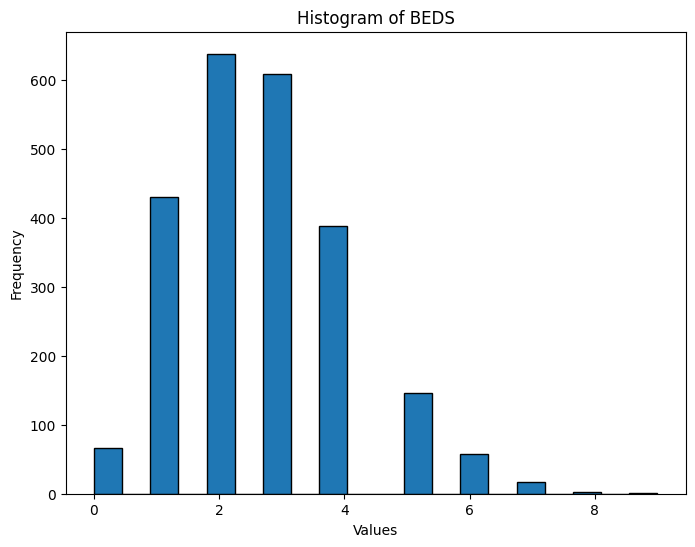

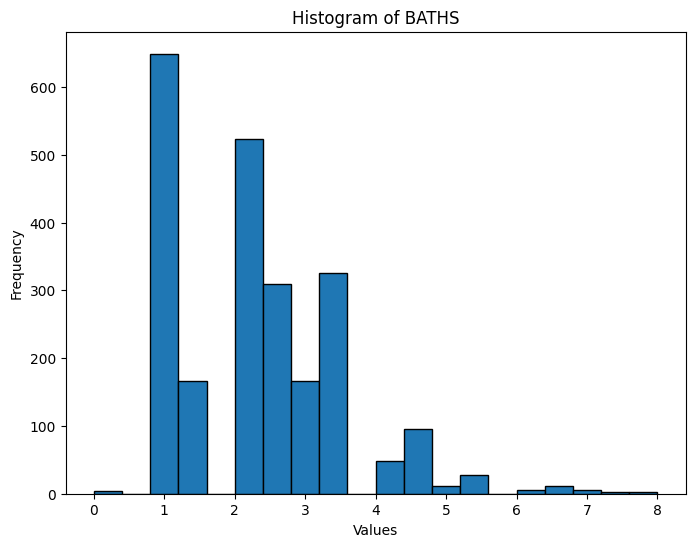

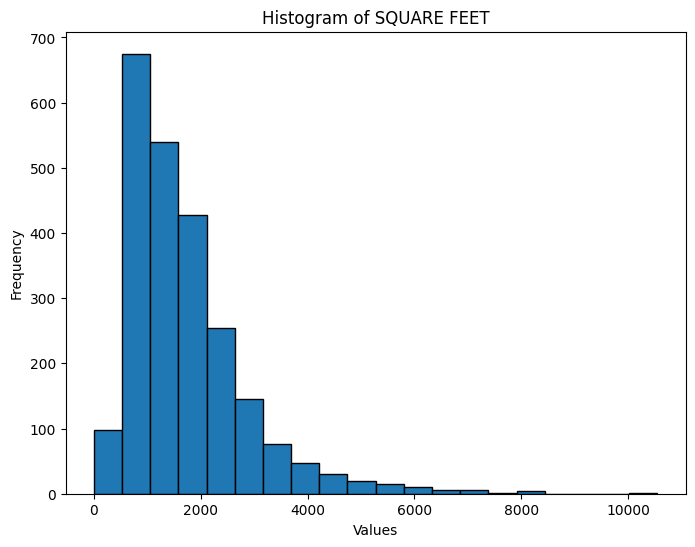

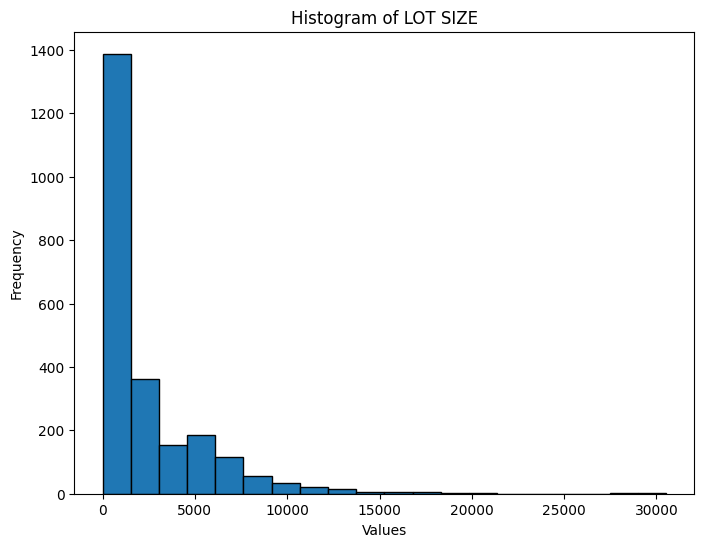

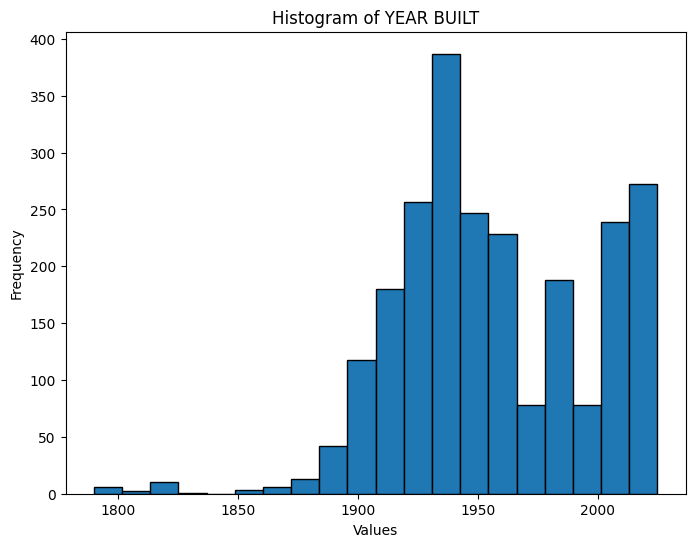

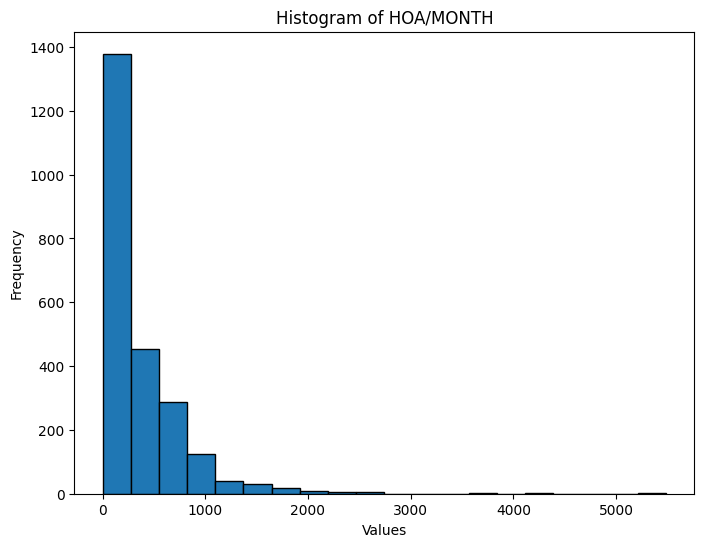

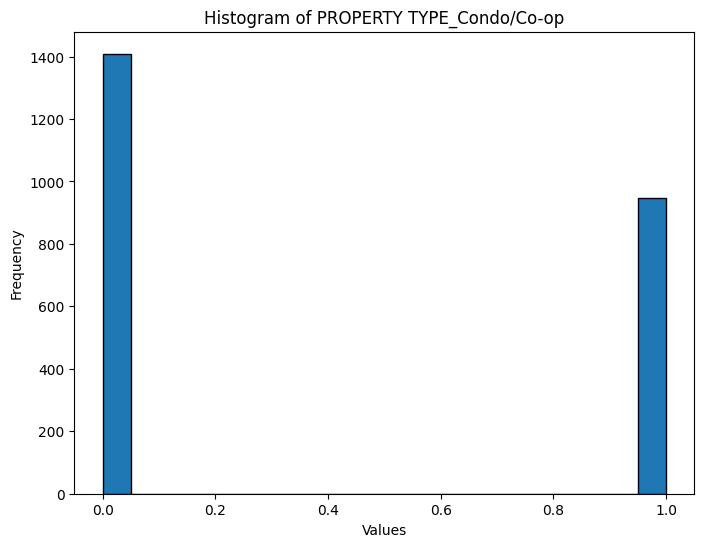

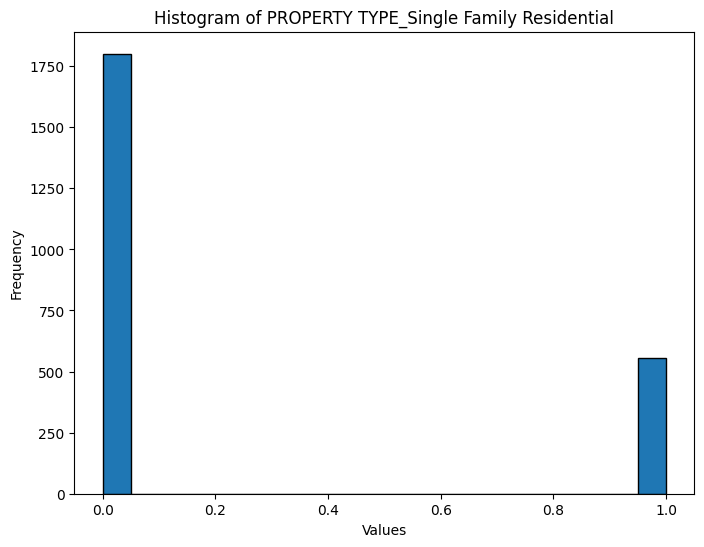

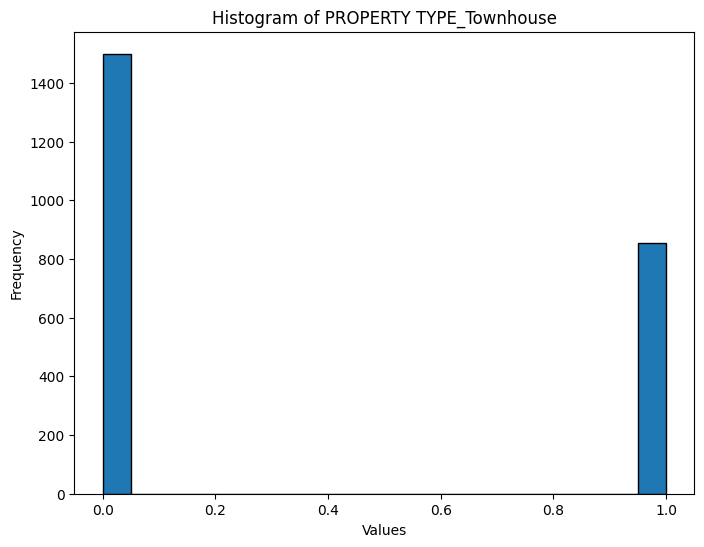

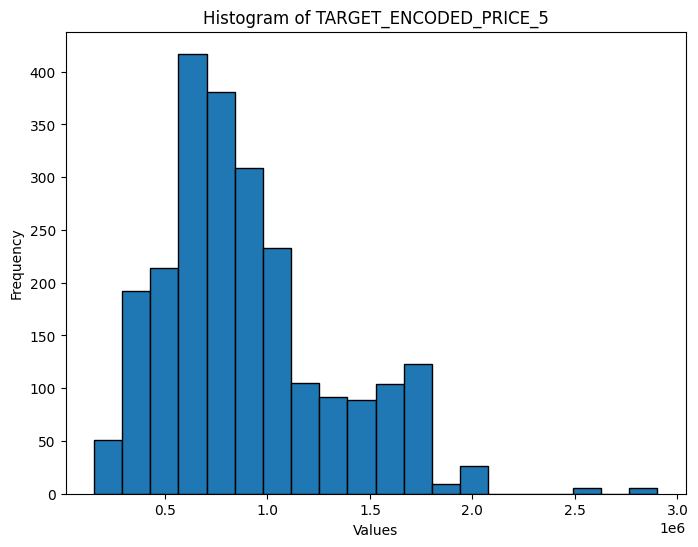

In [ ]:
for col in dfs['df_5'].columns:
  plt.figure(figsize=(8, 6))
  plt.hist(dfs['df_5'][col], bins=20, edgecolor='black')
  plt.title('Histogram of ' + col)
  plt.xlabel('Values')
  plt.ylabel('Frequency')
  plt.show()

No obscene outliers which is good. Distributions are often skewed which suggests to use a robust scaler for our numeric variables

We can also look at the distribution of all the 10 options of target encoding

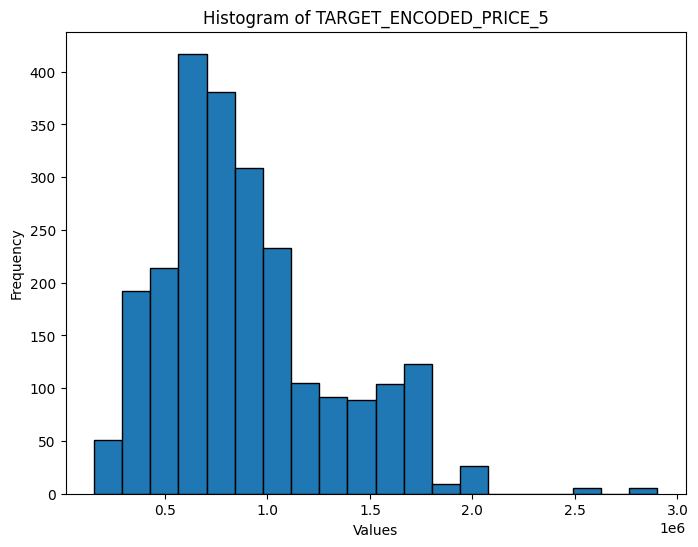

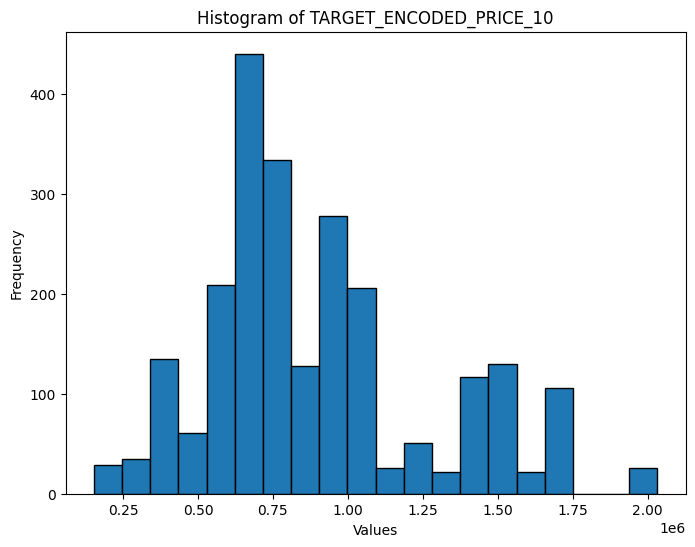

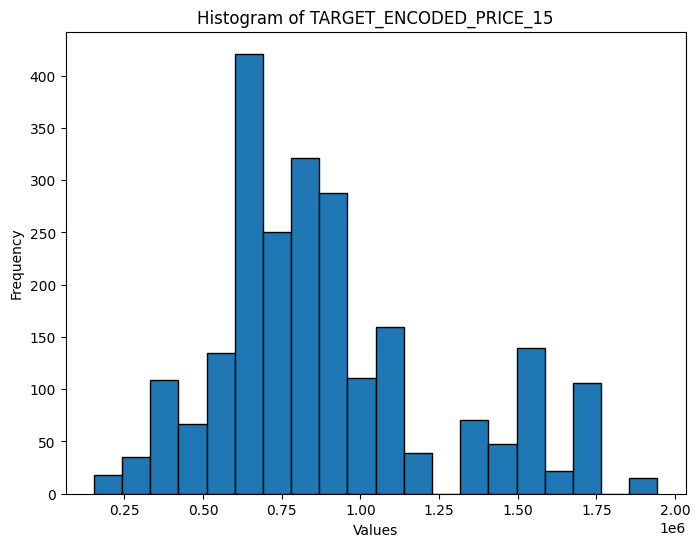

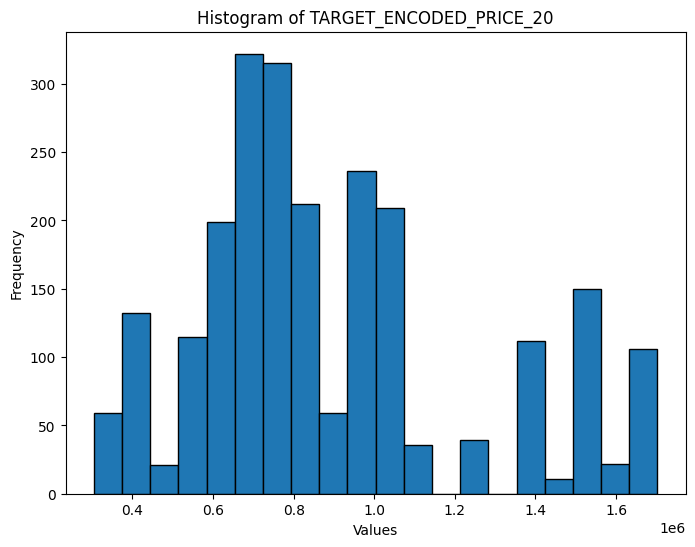

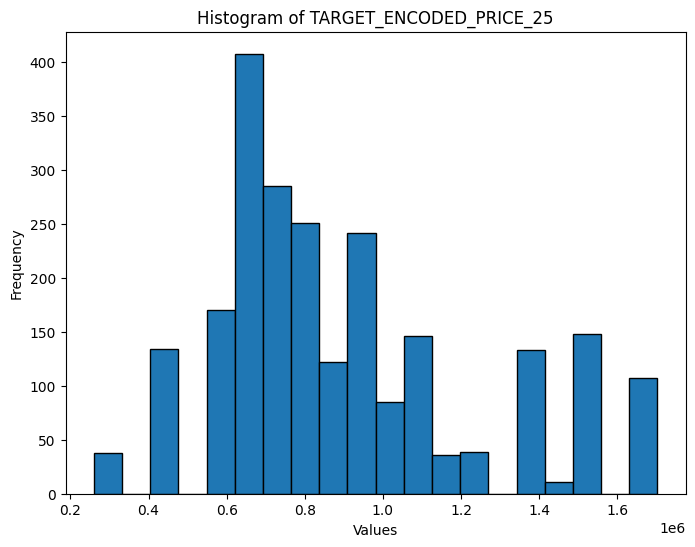

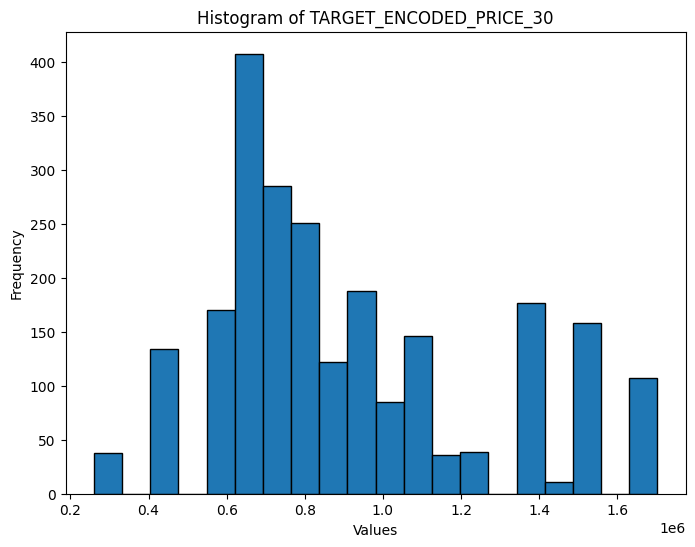

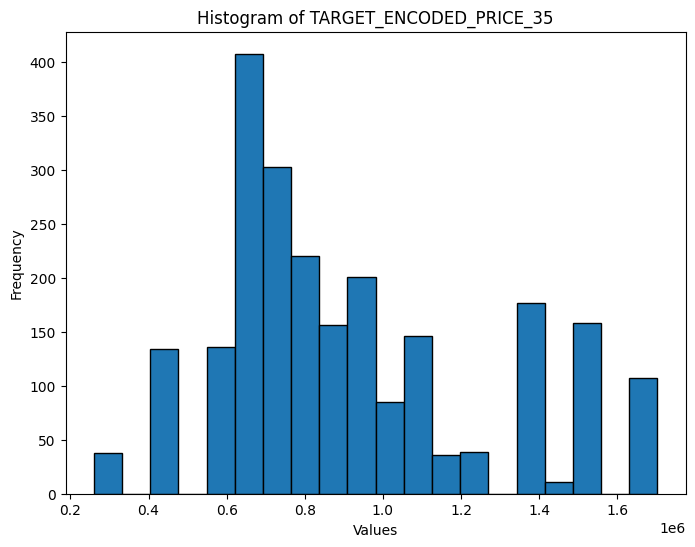

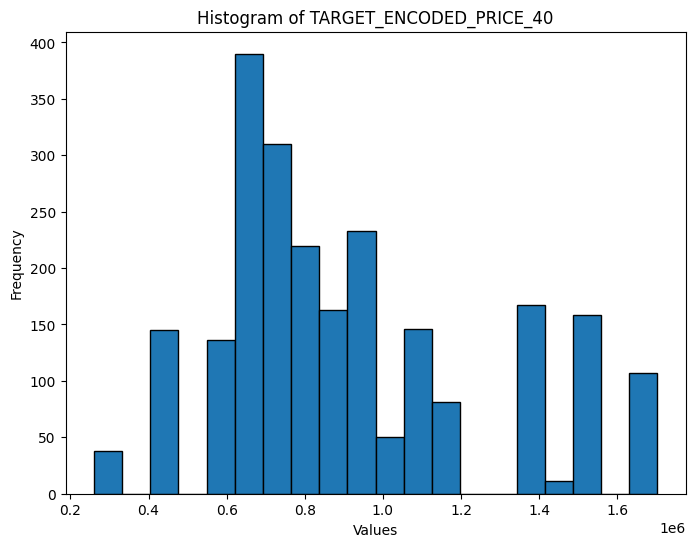

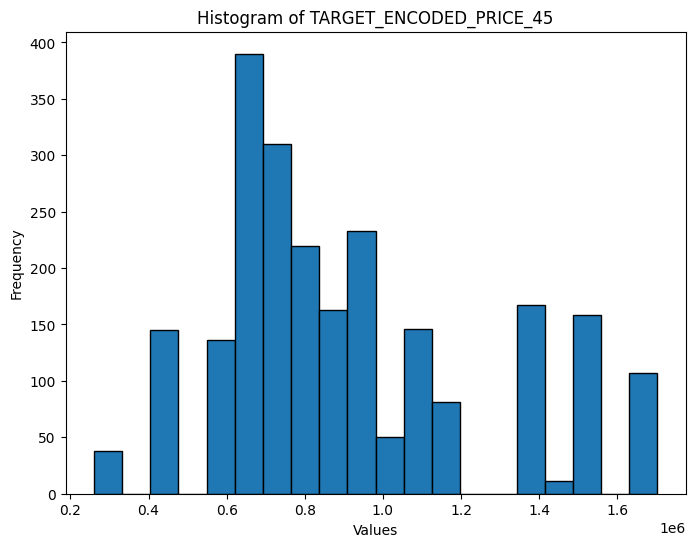

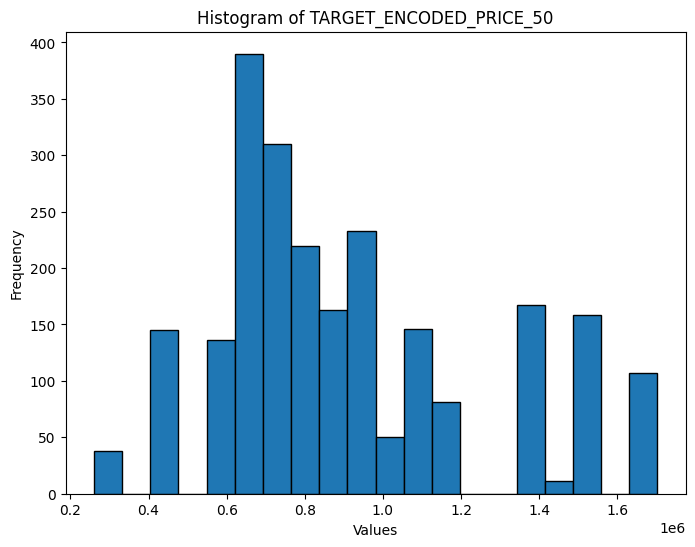

In [ ]:
for col in encoded_df.iloc[:, 3:].columns:
  plt.figure(figsize=(8, 6))
  plt.hist(encoded_df.iloc[:, 3:][col], bins=20, edgecolor='black')
  plt.title('Histogram of ' + col)
  plt.xlabel('Values')
  plt.ylabel('Frequency')
  plt.show()

These distributions seem appropriate to throw into the robust scaler as well

In [ ]:
y = df['PRICE']
for key in dfs:
  dfs[key] = dfs[key].drop(columns = ['PRICE'])

We are using a robust scaler on all columns except PROPERTY TYPE_Condo/Co-op, PROPERTY TYPE_Single Family Residential, and PROPERTY TYPE_Townhouse



In [ ]:
for key in dfs:
  exclude_columns = ['PROPERTY TYPE_Condo/Co-op', 'PROPERTY TYPE_Single Family Residential', 'PROPERTY TYPE_Townhouse']
  all_columns = dfs[key].columns
  robust_columns = [col for col in all_columns if col not in exclude_columns]
  scaler = RobustScaler()
  dfs[key][robust_columns] = scaler.fit_transform(dfs[key][robust_columns])

Now we have 10 different scaled dataframes. Let's see which threshold for target encoding performs the best on cross folds

Model Selection:

In [ ]:
for key in dfs:
  X_train, X_test, y_train, y_test = train_test_split(dfs[key], y, test_size=0.2, random_state=42)
  linear_model = LinearRegression()
  param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.025, 0.05, 0.01],
    'max_depth': [3, 4, 5, 6],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.1, 0.2],
    'reg_lambda': [0, 0.1, 0.2]
   }

  xgb_model = XGBRegressor(random_state=42)

  random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_grid, #Cut down on n_iter since we have 10 different thresholds to test
                                   n_iter=30, scoring='r2', cv=5,
                                   random_state=42, verbose=1, n_jobs=-1)

  random_search.fit(X_train, y_train)

  print("Best Parameters found: ", random_search.best_params_)
  xgb_model = random_search.best_estimator_
  param_grid = {
    'n_estimators': randint(100, 1000),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'bootstrap': [True, False]
  }


  rf_model = RandomForestRegressor(random_state=42)


  random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid, #Cut down on n_iter since we have 10 different thresholds to test
                                   n_iter=10, scoring='r2', cv=5,
                                   random_state=42, verbose=1, n_jobs=-1)

  random_search.fit(X_train, y_train)

  print("Best Parameters found: ", random_search.best_params_)
  rf_model = random_search.best_estimator_
  models = {'linear_model': linear_model, 'xgb_model': xgb_model, 'rf_model': rf_model}
  for model_name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    print(f"Score for {model_name} on {key} : {scores}")
    print(f"Mean score for {model_name} on {key} : {np.mean(scores)}")

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters found:  {'subsample': 1.0, 'reg_lambda': 0.1, 'reg_alpha': 0.2, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 0.8}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters found:  {'bootstrap': False, 'max_depth': 40, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 13, 'n_estimators': 513}
Score for linear_model on df_5 : [0.74547223 0.81556127 0.79526152 0.77039415 0.75310547]
Mean score for linear_model on df_5 : 0.7759589280838599
Score for xgb_model on df_5 : [0.82254964 0.75625599 0.84614285 0.79263326 0.84550761]
Mean score for xgb_model on df_5 : 0.8126178682741431
Score for rf_model on df_5 : [0.78756325 0.80445937 0.82441247 0.75981214 0.81105827]
Mean score for rf_model on df_5 : 0.7974611000537786
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters found:  {'subsample': 1.0, 'reg_lambda':

It looks like we get best performance with the highest thresholds and xgb_models. So we will select the threshold of 50 houses in a neighborhood

In [ ]:
X = dfs['df_50']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.025, 0.05, 0.01],
    'max_depth': [3, 4, 5, 6],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.1, 0.2],
    'reg_lambda': [0, 0.1, 0.2]
}

xgb_model = XGBRegressor(random_state=42)

random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_grid,
                                   n_iter=100, scoring='r2', cv=5,
                                   random_state=42, verbose=1, n_jobs=-1)

random_search.fit(X_train, y_train)

print("Best Parameters found: ", random_search.best_params_)
xgb_model = random_search.best_estimator_

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters found:  {'subsample': 1.0, 'reg_lambda': 0.1, 'reg_alpha': 0.2, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 0.8}


In [ ]:
scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='r2')
print(scores)
print(np.mean(scores))

[0.83456974 0.81631973 0.87249457 0.81951103 0.89836037]
0.848251088714268


Model evaluation:

In [ ]:
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_pred = xgb_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2): {r2}")

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': xgb_model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print("Feature Importances:")
print(feature_importances)

R-squared (R2): 0.8242284991168398
Mean Squared Error (MSE): 79946964890.82637
Feature Importances:
                                   Feature  Importance
2                              SQUARE FEET    0.435773
1                                    BATHS    0.202389
9                  TARGET_ENCODED_PRICE_50    0.114594
6                PROPERTY TYPE_Condo/Co-op    0.048293
0                                     BEDS    0.039993
3                                 LOT SIZE    0.038690
4                               YEAR BUILT    0.038551
8                  PROPERTY TYPE_Townhouse    0.035149
5                                HOA/MONTH    0.025381
7  PROPERTY TYPE_Single Family Residential    0.021187


Since the highest threshold we tested yielded the best performance, this suggests to use even higher thresholds or to just target encode and zip code altogehter. We will test this in another notebook following the same outline

(Note: After testing, it was determined that using a threshold of 50 was indeed the best performing threshold. So this ended up being our best base model)